# 0. import

In [1]:
# 라이브러리 불러오기 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 데이터 로드

In [2]:
# 응급 출동 데이터 불러오기
# 파일명 119_emergency_dispatch.csv, encoding='cp949'

data = pd.read_csv("119_emergency_dispatch.csv", encoding = "cp949")
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간
0,P10715,2023-09-30,성**,여자,65,36.9,102,66,1,0,...,0,0,0,0,0,1,0,0,심근경색,8
1,P10959,2023-10-26,표**,남자,86,36.7,106,72,0,0,...,0,1,0,0,0,0,0,0,복부손상,40
2,P11863,2023-10-05,변**,여자,21,38.1,120,77,0,0,...,0,1,0,0,0,0,0,0,복부손상,27
3,P12186,2023-10-17,도**,남자,57,36.5,129,75,0,0,...,0,0,0,0,0,1,0,0,뇌경색,26
4,P15043,2023-10-01,송**,여자,88,39.1,103,65,0,0,...,0,1,0,0,0,0,0,0,복부손상,62


## (1) 기초 정보 확인

In [3]:
data.shape

(17210, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210 entries, 0 to 17209
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        17210 non-null  object 
 1   출동일시      17210 non-null  object 
 2   이름        17210 non-null  object 
 3   성별        17210 non-null  object 
 4   나이        17210 non-null  int64  
 5   체온        17210 non-null  float64
 6   수축기 혈압    17210 non-null  int64  
 7   이완기 혈압    17210 non-null  int64  
 8   호흡 곤란     17210 non-null  int64  
 9   간헐성 경련    17210 non-null  int64  
 10  설사        17210 non-null  int64  
 11  기침        17210 non-null  int64  
 12  출혈        17210 non-null  int64  
 13  통증        17210 non-null  int64  
 14  만지면 아프다   17210 non-null  int64  
 15  무감각       17210 non-null  int64  
 16  마비        17210 non-null  int64  
 17  현기증       17210 non-null  int64  
 18  졸도        17210 non-null  int64  
 19  말이 어눌해졌다  17210 non-null  int64  
 20  시력이 흐려짐   17210 non-null  in

In [5]:
data.isna().sum()

ID          0
출동일시        0
이름          0
성별          0
나이          0
체온          0
수축기 혈압      0
이완기 혈압      0
호흡 곤란       0
간헐성 경련      0
설사          0
기침          0
출혈          0
통증          0
만지면 아프다     0
무감각         0
마비          0
현기증         0
졸도          0
말이 어눌해졌다    0
시력이 흐려짐     0
중증질환        0
이송 시간       0
dtype: int64

# 2.  데이터 전처리

`-` '나이' 컬럼을 활용하여 [신생아, 10대미만, 10대, 20대~ 80대, 90이상]으로 구분

In [6]:
data['연령구분'] = pd.cut(data["나이"], 
                      labels = ["신생아", "10대미만", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90이상"], 
                      bins = [-np.inf, 0, 9, 19, 29, 39, 49, 59, 69, 79, 89, np.inf])
data.head()

,ID,출동일시,이름,성별,나이,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,...,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,중증질환,이송 시간,연령구분
0,P10715,2023-09-30,성**,여자,65,36.9,102,66,1,0,...,0,0,0,0,1,0,0,심근경색,8,60대
1,P10959,2023-10-26,표**,남자,86,36.7,106,72,0,0,...,1,0,0,0,0,0,0,복부손상,40,80대
2,P11863,2023-10-05,변**,여자,21,38.1,120,77,0,0,...,1,0,0,0,0,0,0,복부손상,27,20대
3,P12186,2023-10-17,도**,남자,57,36.5,129,75,0,0,...,0,0,0,0,1,0,0,뇌경색,26,50대
4,P15043,2023-10-01,송**,여자,88,39.1,103,65,0,0,...,1,0,0,0,0,0,0,복부손상,62,80대


`-` 출동일자 컬럼에서 출동월 정보를 추출하기

In [7]:
data['출동월'] = [i.split("-")[1] for i in data["출동일시"]]

`-` 발열 정보 추출

* 체온이 37도 이상이면 1, 그렇지 않으면 0

In [8]:
data['발열'] = [1 if i >= 37 else 0 for i in data["체온"]]

`-` 혈압 정보 추출

* 수축기 혈압 컬럼을 활용하여 140이상인 경우 1, 그렇지 않으면 0으로 구분

* 수축기 혈압이 90이하인 경우 1, 그렇지 않으면 0

In [9]:
data['고혈압'] = [1 if i >= 140 else 0 for i in data["수축기 혈압"]]

data['저혈압'] = [1 if i <= 90 else 0 for i in data["수축기 혈압"]]

***

# 3. 단변량 분석 - 범주형 데이터

## (1) 중증질환

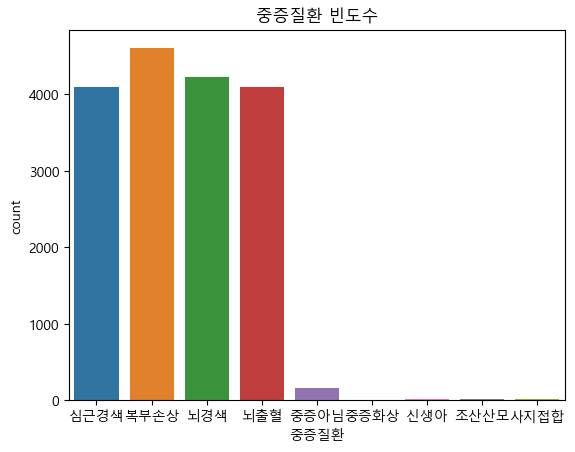

In [10]:
import seaborn as sns

sns.countplot(x = data["중증질환"])
plt.title("중증질환 빈도수")
plt.show()

`-` 중증 질환 중 `[심근경색, 복부손상, 뇌경색, 뇌출혈]`에 대한 자료만 추출하여 분석

In [11]:
c = ['심근경색', '복부손상', '뇌경색', '뇌출혈']
desease = data.loc[map(lambda x : x in c, data["중증질환"]), : ]

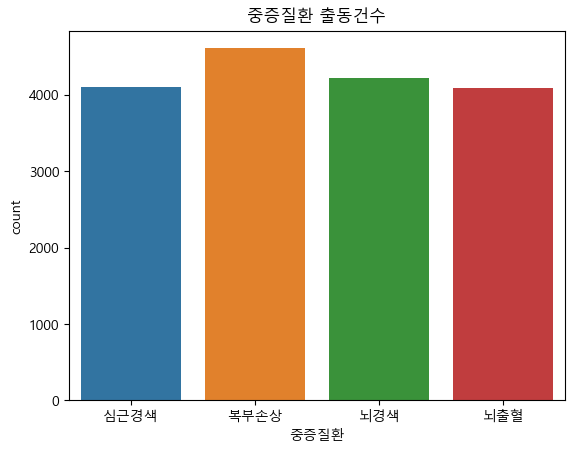

In [12]:
sns.countplot(x = desease["중증질환"])
plt.title("중증질환 출동건수")
plt.show()

## (2) 연령대

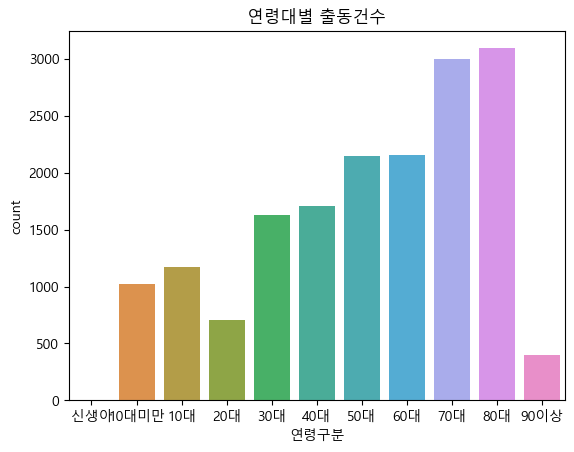

In [13]:
sns.countplot(x = desease["연령구분"])
plt.title("연령대별 출동건수")
plt.show()

***

# 4. 단변량 분석 - 수치형 데이터

## (1) 체온

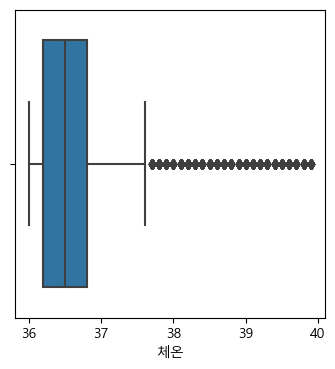

In [14]:
plt.figure(figsize = (4,4))
sns.boxplot(x = desease["체온"])
plt.show()

`-` 체온컬럼은 다수의 이상치가 보이나, 응급상황에 따른 병원 이송 솔루션이기 때문에 제거하거나 다른값으로 대체하기엔 적절하지 않다

# 5. 이변량 분석 : 범주 vs 범주

* Target : 중증 질환
* Feature : 성별, 연령구분, 출동월, 증상 리스트

In [15]:
c = ['성별', '연령구분', '출동월']
c1 =  ['호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도',
       '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']
c.extend(c1)

In [16]:
chi2_p = []
chi2_s = []

for i in range(len(c)) :
    chi2_p.append(spst.chi2_contingency(pd.crosstab(desease[c[i]],desease["중증질환"]))[1])
    chi2_s.append(spst.chi2_contingency(pd.crosstab(desease[c[i]],desease["중증질환"]))[0])

In [17]:
symptom = ['호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', '무감각', '마비', '현기증', '졸도',
       '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']

result1 = pd.DataFrame({"var" : c, "stat" : chi2_s, "p-value" : chi2_p})
result1["기각여부"] = ["기각" if i <=0.05 else "기각 x" for i in result1["p-value"]]
result1

,var,stat,p-value,기각여부
0,성별,1.632336,6.520803e-01,기각 x
1,연령구분,20.724015,7.990422e-01,기각 x
2,출동월,27.426785,6.007840e-01,기각 x
3,호흡 곤란,12143.468674,0.000000e+00,기각
4,간헐성 경련,1191.634967,4.787739e-258,기각
5,설사,2153.464755,0.000000e+00,기각
6,기침,1075.098480,9.191766e-233,기각
7,출혈,2341.378625,0.000000e+00,기각
8,통증,1690.206920,0.000000e+00,기각
9,만지면 아프다,6423.164301,0.000000e+00,기각


***

# 6. 이변량 분석  : 수치 vs 범주

 * Target : 중증 질환
 * Feature : 나이, 체온, 수축기 혈압, 이완기 혈압

## (1) bar chart

In [18]:
_l = desease["중증질환"].unique()
_l

anova_column = ['나이', '체온', '수축기 혈압', '이완기 혈압']

aov_stat = []
for j in range(len(anova_column)) :
    for i in range(len(_l)) :
        exec(f"p_{j}{i} = desease.loc[desease['중증질환'] == _l[{i}] , [anova_column[{j}]]]")
        
anova1 = spst.f_oneway(p_00,p_01,p_02,p_03)
anova2 = spst.f_oneway(p_10,p_11,p_12,p_13)
anova3 = spst.f_oneway(p_20,p_21,p_22,p_23)
anova4 = spst.f_oneway(p_30,p_31,p_32,p_33)

In [19]:
aov_spst =[anova1[0][0],anova2[0][0],anova3[0][0],anova4[0][0]]
aov_p =[anova1[1][0],anova2[1][0],anova3[1][0],anova4[1][0]]

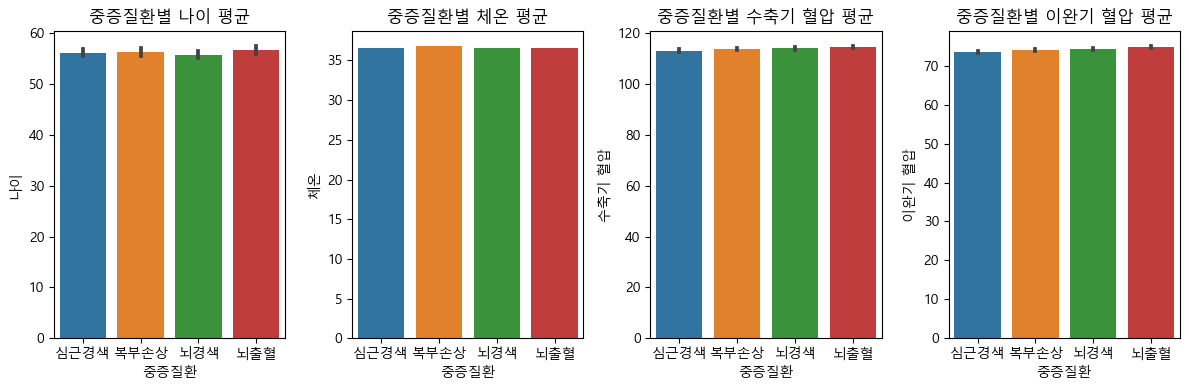

In [20]:
import seaborn as sns
fig, axes = plt.subplots(1,4, figsize = (12, 4))

for i in range(4) :
    sns.barplot(y=anova_column[i], x = "중증질환", data = desease, ax = axes[i])
    axes[i].set_title(f"중증질환별 {anova_column[i]} 평균")
    
fig.tight_layout()

## (2) anova

In [21]:
result2 = pd.DataFrame({"var" : anova_column,
              "stat" : aov_spst,
              "p-value" : aov_p})

result2["기각여부"] = ["기각" if i<=0.05 else "기각 x" for i in result2["p-value"]]

In [22]:
total_result = pd.concat([result1, result2], axis = 0)
total_result = total_result.loc[total_result.기각여부 == "기각", :].reset_index(drop = True)

In [23]:
total_result

,var,stat,p-value,기각여부
0,호흡 곤란,12143.468674,0.000000e+00,기각
1,간헐성 경련,1191.634967,4.787739e-258,기각
2,설사,2153.464755,0.000000e+00,기각
3,기침,1075.098480,9.191766e-233,기각
4,출혈,2341.378625,0.000000e+00,기각
5,통증,1690.206920,0.000000e+00,기각
6,만지면 아프다,6423.164301,0.000000e+00,기각
7,무감각,3834.728328,0.000000e+00,기각
8,마비,6827.361021,0.000000e+00,기각
9,현기증,3120.203329,0.000000e+00,기각


In [24]:
total_result.to_csv("변수선택.csv", index = False)